# Mathematik für Biologiestudierende

Wintersemester 2025/26

25.11.2025

&copy; 2025 Prof. Dr. Rüdiger W. Braun 

## Wiederholung (interaktiv)

Gehen Sie auf die Website

* https://pingo.coactum.de

und geben Sie folgende Zugangsnummer ein

* **670719**

oder scannen Sie den QR-Code

![QR-Code](bilder/qr02.png)

## Themen heute

* zweiseitiger Binomialtest
* Versuchsplanung für Binomialtests
* erste Ableitung
* Hoch- und Tiefpunkte
* höhere Ableitung
* Beispiel für ein Modell

In [1]:
import numpy as np
np.set_printoptions(legacy='1.21')
import seaborn as sns
sns.set_theme()
#sns.set_context('talk')
import pandas as pd
from scipy import stats

# Ein- und zweiseitige Tests

* Ein ja/nein-Experiment mit unbekannter Erfolgswahrscheinlichkeit $p$ wird $n$-mal wiederholt
* Ziel:  Aussage über $p$ relativ zu einem Referenzwert $p_0$ 
* verschiedene Nullhypothesen sind denkbar
  * $H_0 : p \ge p_0$: einseitiger unterer Test
  * $H_0 : p \le p_0$: einseitiger oberer Test
  * $H_0 : p = p_0$: zweiseitiger Test
* Die Nullhypothese $H_0 \colon p \ne p_0$ macht keinen Sinn

## Zweiseitiger Binomialtest zum Niveau  $\alpha$

* Gegeben sind unabhängige $B(1, p)$-verteilte Zufallsvariable $X_1, \dots, X_n$ mit unbekanntem $p$ sowie ein Signifikanzniveau $\alpha$
* Verglichen werden soll mit einem Referenzwert $p_0$
* Getestet wird die Nullhypothese $H_0 = \{p = p_0\}$ gegen die Alternative $H_1 = \{p \ne p_0\}$
* `P` ist die Binomialverteilung $B_{n,p_0}$

* Der *untere kritische Wert* $c_1$ ist so zu wählen, dass `P.cdf(c1 - 1)`$\le\frac\alpha2$ und `P.cdf(c1)`$>\frac\alpha2$

* Der *obere kritische Wert* $c_2$ ist so zu wählen, dass `P.cdf(c2 - 1)`$<1-\frac\alpha2$ und `P.cdf(c2)`$\ge1-\frac\alpha2$

Der zweiseitige Binomialtest besteht also aus einem unteren und einem oberen einseitigen Binomialtest, die aber beide zum halben Signifikanzniveau durchgeführt werden

#### Zweiseitiger Binomialtest, Beispiel

* Bei 250 Würfen eines Würfels fiel 55 mal eine Sechs.  Kann man zu 95% sicher sein, dass der Würfel gezinkt ist?
* Sei $p$ die unbekannte Wahrscheinlichkeit des Würfels für eine Sechs
* Zweiseitiger Binomialtest mit
  * Nullhypothese: $H_0 = \left\{ p = \frac16 \right\}$
  * Alternative: $H_1 = \left\{ p \ne \frac16 \right\}$
  * Signifikanzniveau ist $\alpha = 0.05$

In [2]:
P = stats.binom(250, 1/6)
alpha = 0.05

In [3]:
c1 = P.ppf(alpha/2)
c1

30.0

In [4]:
c2 = P.ppf(1-alpha/2)
c2

54.0

Punktrechnung vor Strichrechnung

Achtung:  keine Seite der HHU: https://www.spiegel.de/spiegel/print/index-2023.html

#### Beispiel, Fortsetzung

* $c_1 = 30$ und $c_2 = 54$
* Die Nullhypothese kann zum Niveau $\alpha = 0.05$ abgelehnt werden, wenn höchstens 29 oder mindestens 55 Sechsen fallen
* Bei 55 Sechsen kann die Nullhypothese also abgelehnt werden
* Wir können mit 95% Sicherheit sagen, dass der Würfel gezinkt ist

<img src="https://www.math.uni-duesseldorf.de/~braun/bio2526/b250.svg" alt="Fehler zweiter Art für das Würfelbeispiel" width="55%"/>

Orange Balken zeigen Fehlentscheidungen

### *p*-Wert des zweiseitigen Tests

In [5]:
res = stats.binomtest(55, 250, 1/6)  # "zweiseitig" ist die Standardeinstellung
res.pvalue

0.02718643157092374

### Power des zweiseitigen Tests

* Wir wollen erkennen können, wenn der Würfel so stark gezinkt ist,  dass die Wahrscheinlichkeit für eine Sechs 20% beträgt.  Was ist dann die Power des Tests?

* Die Wahrscheinlichkeit der richtigen Entscheidung ist
$$  \sum_{k=0}^{29} B_{250,\,0.2}(k) + \sum_{k=55}^{250} B_{250,\,0.2}(k) $$

In [6]:
Q = stats.binom(250, 0.2)

In [7]:
erste_summe = Q.cdf(29)
erste_summe

0.0002997560505954973

In [8]:
zweite_summe = 1 - Q.cdf(54)
zweite_summe

0.2359822558674649

In [9]:
power = erste_summe + zweite_summe
power

0.2362820119180604

# Versuchsplanung

#### Zurück zum Beispiel "Mutationen"

* In einer Population weist normalerweise jedes 250te Individuum eine gewisse Mutation auf.  
* Bei einer Untersuchung von 2000 Individuen werden nun aber sogar 12 Träger der Mutation gefunden,
* $2000/250=8$, man hätte also 8 Träger von Mutationen erwartet

* Im Beispiel "Mutation" hatten wir für n=2000 eine Power von 32% erzielt, wenn die wahre Mutationsrate den Wert 0.006 hat
* Welche Power hätten wir für n=10000?

In [10]:
n = 10000
alpha = 0.05
p0 = 0.004
P = stats.binom(n, p0)
c = P.ppf(1-alpha)
c

51.0

Der kritische Wert ist also $c=51$

In [11]:
p = 0.006
Q = stats.binom(n, p)
1 - Q.cdf(c)  

0.865685152339395

* beim Stichprobenumfang n=10000 ist 0.8657 die Wahrscheinlichkeit für die richtige Entscheidung, also die Power 

#### Frage:  Bei welchem Stichprobenumfang bekommen wir eine Power von 90%

* Bereits gesehen:  n=10000 ist zu wenig
* Dasselbe mit n=20000:

In [12]:
n = 20000
P = stats.binom(n, p0)
c = P.ppf(1-alpha)
c

95.0

In [13]:
Q = stats.binom(n, p)
1 - Q.cdf(c)

0.989577529617209

Mehr als nötig

In [14]:
n = 12000
P = stats.binom(n, p0)
c = P.ppf(1-alpha)
c

60.0

In [15]:
Q = stats.binom(n, p)
1 - Q.cdf(c)

0.9158835701280577

* n=12000 reicht aus
* Genaue Wert sind hier nicht nötig, weil der Wert p=0.006 auch nur geschätzt ist
* Deswegen genügt es in der Praxis meistens, mit copy und paste ein halbes Dutzend Szenarien zu rechnen

Geht natürlich auch automatisch 

In [16]:
df = pd.DataFrame()
df['n'] = np.arange(5000, 16000)
df['c'] = stats.binom(df.n, p0).ppf(1-alpha)
df['power'] = 1 - stats.binom(df.n, p).cdf(df.c)
df

,n,c,power
0,5000,28.0,0.597340
1,5001,28.0,0.597763
2,5002,28.0,0.598185
3,5003,28.0,0.598607
4,5004,28.0,0.599029
...,...,...,...
10995,15995,77.0,0.973767
10996,15996,77.0,0.973804
10997,15997,77.0,0.973840
10998,15998,77.0,0.973876


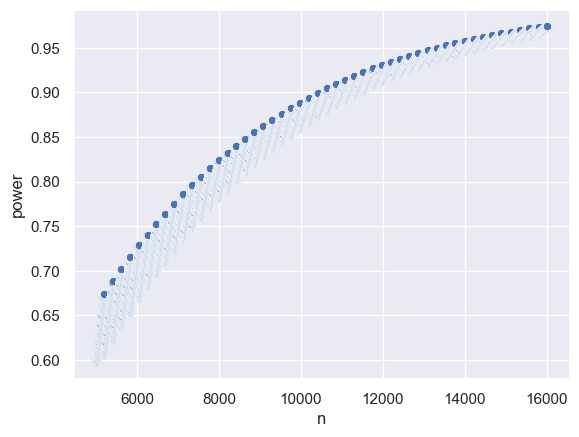

In [17]:
sns.scatterplot(data=df, x='n', y='power');

Wir schauen noch einmal feiner in den interessanten Abschnitt

In [18]:
dfein = df[(df.n >= 10200) & (df.n < 10700)]

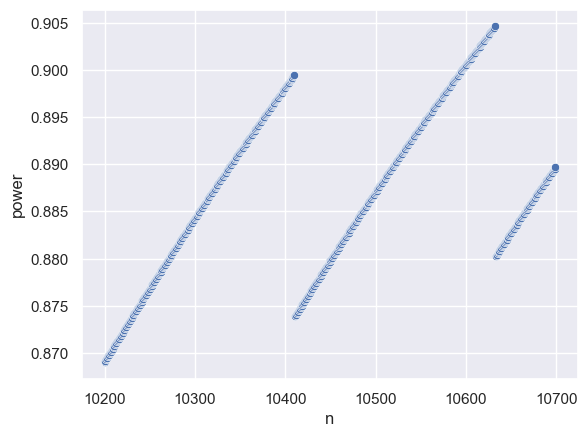

In [19]:
sns.scatterplot(data=dfein, x='n', y='power');

* Wir benötigen n=10600 

* An den Stellen, wo die Kurve nach unten springt, ändert sich der kritische Wert

# Differentialrechnung 

Differentialrechnung kommt in der Biologie vor

* Bestimmung von Maxima und Minima:  mehrdimensionale Kurvendiskussion
  * in der Statistik
    * Maximum-Likelihood Schätzer 
    * z.B. in der Statistik linearer Modelle (Thema nach Weihnachten, passiert aber "unter der Haube")
* Bei der Modellierung von Prozessen:  Dynamische Systeme
* Integrale:  die Verteilungsfunktionen von kontinuierlichen Zufallsvariablen sind Integrale

### Ableitung als Tangentensteigung

<img src="https://www.math.uni-duesseldorf.de/~braun/bio2526/skizze_abl.svg" alt="Funktion und Tangente" width="45%"/>

Die *Ableitung* einer Funktion $f$ an einer Stelle $x$ gibt die Steigung der Tangente in $x$ an

Die Tangentensteigung wird durch Sekantensteigungen approximiert

<img src="https://www.math.uni-duesseldorf.de/~braun/bio2526/skizze_sek1.svg" alt="Funktion und Tangente" width="45%"/>

$$
    f'(x) = \lim_{h\to0} \frac{f(x+h) - f(x)}h
$$

## Ableitungen wichtiger Funktionen
$$ \begin{align*}
    f(x) &= C & f'(x) &= 0 & \text{Konstante} \\[2ex]
    f(x) &= x^n & f'(x) &= n \cdot x^{n-1} \\[2ex]
    f(x) &= \frac1x & f'(x) &= -\frac1{x^2} \\[2ex]
    f(x) &= \exp(x) & f'(x) &= \exp(x) \\[2ex]
    f(x) &= \ln(x) & f'(x) &= \frac1x 
\end{align*} $$

## Produktregel

$$ f(x) = g(x) \cdot h(x)
$$
Dann
$$
    f'(x) = g'(x) \cdot h(x) + g(x) \cdot h'(x)
$$

Beispiel
$$  f(x) = x^3 \cdot \exp(x)
$$

$$ \begin{align*}
    g(x) &= x^3 & h(x) &= \exp(x) \\
    g'(x) & = 3x^2 & h'(x) &= \exp(x)
\end{align*}  $$

$$
    f'(x) = 3 x^2 \cdot \exp(x) + x^3 \cdot \exp(x)
$$

## Kettenregel

$$  f(x) = g(h(x))
$$
Dann
$$  f'(x) = g'(h(x)) \cdot h'(x)
$$

Beispiel:
    
$$  f(x) = e^{5x}
$$

\begin{align*}
    g(x) &= \exp(x) &  h(x) &= 5x  \\
    g'(x) &= \exp(x) & h'(x) &= 5
\end{align*}

$$
    f'(x) = 5\exp(5x) 
$$

Noch ein Beispiel:

$$
    f(x) = 2^x
$$

\begin{align*}
    g(x) &= \exp(x) & h(x) &= \ln(2) \cdot x \\
    g'(x) &= \exp(x) & h'(x) &= \ln(2)
\end{align*}

$$  f'(x) = \ln(2) \cdot \exp(\ln(2) \cdot x) = \ln(2) \cdot 2^x
$$

# Ableitungsregeln

| $$ h(x) $$         |   $$ h'(x) $$                         |              |
|:------------------:|:-------------------------------------:|:-------------|
| $Cf(x)$            |   $C f'(x)$                           |              |
| $f(x) + g(x)$      |  $f'(x) + g'(x)$                      |              |
| $f(x) \cdot g(x)$  | $f'(x) \cdot g(x) + f(x) \cdot g'(x)$ | Produktregel |
| $f(g(x))$          | $f'(g(x)) \cdot g'(x)$                | Kettenregel  |

Hierbei ist $C$ eine Konstante

### Beispiel

$f(x) = x^2 \cdot \exp(-x)$

\begin{align*}
  f'(x) &= \left(x^2\right)' \cdot \exp(-x) + x^2 \cdot \left( \exp(-x) \right)' & & \text{Produktregel} \\
  &= 2x \cdot \exp(-x) + x^2 \cdot(-1) \cdot \exp(-x) & & \text{Kettenregel} \\
  &= \left( 2x - x^2 \right) \cdot \exp(-x) & & \text{Distributivgesetz}
\end{align*}

In [21]:
df = pd.DataFrame()
x = np.linspace(0, 10, 1000)
df['x'] = x
df['y'] = x**2 * np.exp(-x)
df['ys'] = (2*x - x**2) * np.exp(-x)

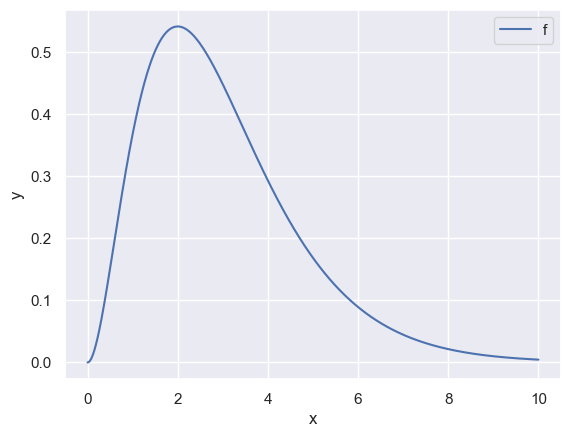

In [34]:
ax = sns.lineplot(data=df, x='x', y='y', label="f")

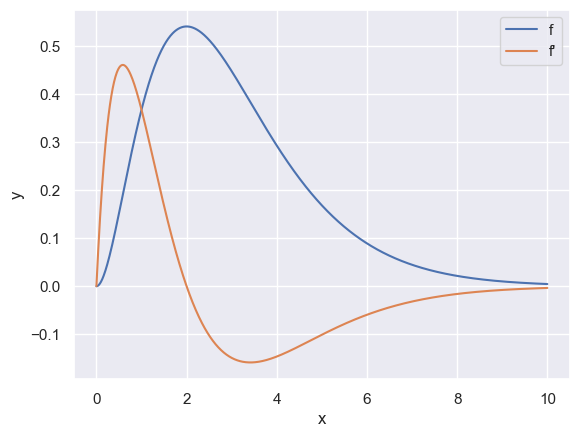

In [35]:
ax1 = sns.lineplot(data=df, x='x', y='ys', ax=ax, label="f'")
ax1.figure

## Qualitatives Verhalten

* wenn $f'(x)>0$, dann wächst die Funktion
* wenn $f'(x)<0$, dann fällt sie

## Beispiel:  Inflation

* die Inflationsrate ist die Ableitung des Preises nach der Zeit

* seit unvordenklichen Zeiten ist die Inflationsrate positiv:  Preise steigen
* in 2022 stieg auch die Inflationsrate:  Preise steigen noch schlimmer
* in 2024 ist die Inflationsrate gefallen (2.5% Inflation statt 10%):  Preise steigen
* aber nicht mehr ganz so schlimm

## Qualitatives Verhalten

* wenn $f'(x)>0$, dann wächst die Funktion
* wenn $f'(x)<0$, dann fällt sie

Das bedeutet:  Für einen Hoch- oder Tiefpunkt $x_0$ von $f$ gilt $f'(x_0)=0$.

# Höhere Ableitungen

* Die Ableitung der Ableitung nennt man zweite Ableitung und schreibt $f''(x)$ dafür
* Zweite Ableitungen treten in der Physik (als Beschleunigung) und überhaupt bei dynamischen Systemen auf
* "Die Inflation hat sich abgeschwächt" bedeutet: "Die zweite Ableitung der Konsumentenpreise ist negativ"

#### Beispiel

$$ f(x) = x^2 \cdot \exp(-x) $$

$$  f'(x) = \left( 2x - x^2 \right) \cdot \exp(-x) $$

\begin{align*}
    f''(x) &= \left( 2 - 2x \right) \cdot \exp(-x) + \left( 2x - x^2 \right) (-1) \exp(-x) && \text{Produktregel} \\
    &= \left( 2 - 4x + x^2 \right) \cdot \exp(-x)
\end{align*}

Wir zeichnen $f''$ in das zuvor erzeugte Bild hinein

In [37]:
df['yss'] = (2 - 4*x + x**2) * np.exp(-x)

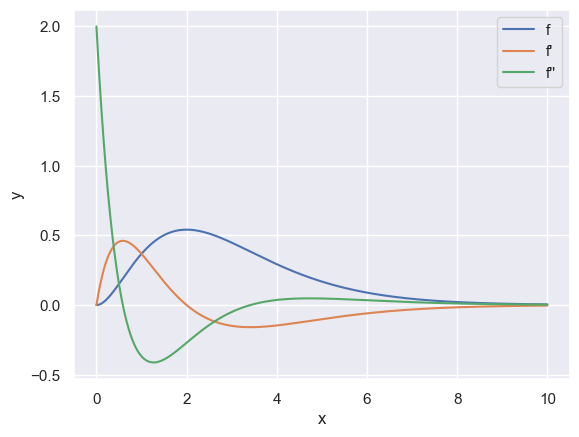

In [40]:
ax2 = sns.lineplot(df, x='x', y='yss', label="f''", ax=ax1)
ax2.figure

#### Beispiel:  Konzentrationen in einer Zelle

* Die Konzentration eines bestimmten Proteins in einer Zelle zum Anfangszeitpunkt $t=0$ beträgt $0\frac{\mu g}{m\ell}$
* Zuerst steigt sie schnell mit $0.8\frac{\mu g}{m\ell\cdot s}$
* Nach 2 Sekunden steigt die Konzentration nicht mehr, das Protein wird von da an exponentiell abgebaut

#### Modell

$$ f(t) = A \cdot t \cdot \exp(-b\cdot t) $$

\begin{align*} f'(t) &= A \cdot \exp(-b \cdot t) + A \cdot t \cdot(-b) \cdot \exp(-b \cdot t)  \\
&= (A - Abt) \cdot \exp(-b \cdot t)
\end{align*}

Wir haben zwei Gleichungen
* f'(0) = 0.8
* f'(2) = 0

Einsetzen
 
* $f'(0) = A$, also $A=0.8$

* $f'(2) = 0$, also $ (A - 2Ab) \cdot \exp(-2b) = 0 $

* $\exp(-2b)$ ist nicht Null, also muss $ A - 2Ab = 0$ gelten, d.h. $b=0.5$

Unser Modell ist also

$$ f(t) = 0.8t \cdot \exp(-0.5t)
$$

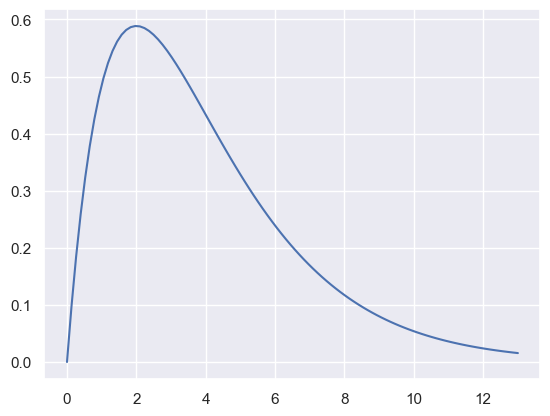

In [43]:
t = np.linspace(0, 13, 100)
y = 0.8*t * np.exp(-0.5*t)
ax = sns.lineplot(x=t, y=y)

* Maximum bei $t=2$, das ist eine der Ausgangsgleichungen
* Wert dort

In [42]:
0.8 * 2 * np.exp(-0.5*2)

0.5886071058743078